# Case Kognita - Análise Exploratória

Neste notebook, será realizada a análise exploratória de dados do dataset fornecido pela X-Health, de modo a extrair insights relevantes e valiosos a partir da análise desses dados

## Importação das bibliotecas e dados

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando dataframe
defaults_df = pd.read_csv('dataset_2021-5-26-10-14.csv', sep='\t', encoding='utf-8')

In [5]:
# Vendo as 5 primeiras linhas do dataframe
defaults_df.head()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0


## Estudando a estrutura do dataset

In [9]:
# Verificando as dimensões do dataset
defaults_df.shape

(117273, 22)

In [11]:
# Verificando as colunas e seus tipos
defaults_df.dtypes

default_3months                  int64
ioi_36months                   float64
ioi_3months                    float64
valor_por_vencer               float64
valor_vencido                  float64
valor_quitado                  float64
quant_protestos                  int64
valor_protestos                float64
quant_acao_judicial              int64
acao_judicial_valor            float64
participacao_falencia_valor    float64
dividas_vencidas_valor         float64
dividas_vencidas_qtd             int64
falencia_concordata_qtd          int64
tipo_sociedade                  object
opcao_tributaria                object
atividade_principal             object
forma_pagamento                 object
valor_total_pedido             float64
month                            int64
year                             int64
default                          int64
dtype: object

In [13]:
# Verificando em quais colunas há dados faltantes
defaults_df.isin(['missing']).sum() # Na documentação do dataset, está indicado que valores ausentes estarão com valor = 'missing'

default_3months                    0
ioi_36months                       0
ioi_3months                        0
valor_por_vencer                   0
valor_vencido                      0
valor_quitado                      0
quant_protestos                    0
valor_protestos                    0
quant_acao_judicial                0
acao_judicial_valor                0
participacao_falencia_valor        0
dividas_vencidas_valor             0
dividas_vencidas_qtd               0
falencia_concordata_qtd            0
tipo_sociedade                   608
opcao_tributaria               18325
atividade_principal              592
forma_pagamento                32477
valor_total_pedido                 0
month                              0
year                               0
default                            0
dtype: int64

A partir dos outputs acima, obtemos informações importantes sobre a base de dados:
- Temos 117273 linhas e 22 colunas
- Das 22 colunas, há 4 que possuem valores ausentes, sendo elas: 'tipo_sociedade', 'opcao_tributaria', 'atividade_principal' e 'forma_pagamento', todas do tipo object/string

## Análise Exploratória

### Dados numéricos

Um bom primeiro passo ao realizar-se uma análise exploratória consiste no cálculo de estatísticas descritivas que resumam o comportamento e a distribuição das variáveis:

In [26]:
# Vamos calcular estatísticas descritivas sobre cada variável
# Não faz sentido calcularmos medidas-resumo em relação a algumas colunas, portanto, serão excluídas desta análise em específico
defaults_df.drop(['default'], axis=1).describe(percentiles=[0.25, 0.5, 0.75, 0.9]).round(2)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year
count,117273.00,117273.00,117273.00,117273.00,117273.00,1.172730e+05,117273.00,117273.00,117273.00,117273.00,117273.0,117273.00,117273.00,117273.00,1.172730e+05,117273.00,117273.00
mean,0.15,55.58,17.11,64213.84,2454.04,1.085557e+06,0.24,2051.02,0.02,921.85,0.0,560.38,0.01,0.00,2.406180e+04,6.28,2017.98
std,0.85,60.99,10.99,525254.63,80933.13,7.444825e+06,10.71,88317.58,0.53,48610.25,0.0,84592.91,0.40,0.03,4.906680e+05,3.19,0.74
min,0.00,1.00,1.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,-7.446900e+02,1.00,2017.00
25%,0.00,20.17,11.12,565.74,0.00,1.944250e+04,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.140420e+03,3.00,2017.00
50%,0.00,38.00,16.00,4451.74,0.00,8.134878e+04,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4.012730e+03,7.00,2018.00
75%,0.00,69.75,18.25,20062.96,0.00,3.322643e+05,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,9.645920e+03,9.00,2019.00
90%,0.00,116.25,28.20,78078.49,101.59,1.255344e+06,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.844450e+04,11.00,2019.00
max,26.00,951.00,90.00,72197586.36,13150500.00,4.603203e+08,2324.00,16305457.00,80.00,8390986.00,0.0,19722514.00,40.00,2.00,1.503340e+08,12.00,2019.00


Pelo resultado acima, começamos a ter uma noção sobre a distribuição e sobre o comportamento das variáveis, sendo os principais insights:
- Os calotes são concentrados em alguns pedidos/clientes e não representam o comportamento usual dos clientes (conforme análise dos valores dos percentis da coluna 'default_3months', em que 90% dos valores não apresenta atrasos/calotes)
- As quantidades de protestos, ações judiciais, dívidas vencidas e concordatas também apresentam alta concentração, sendo que a quantidade de protestos tende a ser um pouco mais elevada do que as demais variáveis citadas pelo fato de apresentar valores maiores de média e desvio padrão
- As quantias monetárias envolvidas têm alta dispersão

Um pequeno parênteses: pela tabela gerada acima, identificamos que a coluna **participacao_falencia_valor** apresenta **apenas** valores nulos, não sendo útil para nossa análise. Por isso, no código abaixo, excluímos essa coluna (e faremos o mesmo nos demais notebooks)

In [32]:
defaults_df = defaults_df.drop('participacao_falencia_valor', axis=1)

Voltando à análise exploratória, um ponto de atenção levantado pela tabela de medidas-resumo é a predominância de distribuições não uniformes de valores, ou seja, com alta concentração. No caso da nossa variável de interesse ('default'), isso se torna ainda mais relevante, pois, caso haja um **desbalanceamento** entre a proporção de calotes x não calotes, o modelo treinado em cima desses dados terá **viés** para a classe com maior representatividade no dataset. Vamos verificar isso a seguir:

In [35]:
defaults_ratio = ((defaults_df['default'] == 1).sum())/defaults_df.shape[0]
defaults_ratio

0.16666240311069044

Percebe-se que os calotes representam apenas **16,67%** dos dados do dataset. Dessa forma, o modelo treinado sobre esses dados **brutos** terá um viés de classificar os pedidos, em sua grande maioria, como **não calotes** (legítimos). Por isso, ao treinar o modelo, será necessário rebalancear essa proporção nos dados de treinamento para eliminar esse viés

Outro aspecto de interesse é a distribuição do número de calotes ao longo do ano (uma relação que não é possível captar por meio da tabela de medidas-resumo):

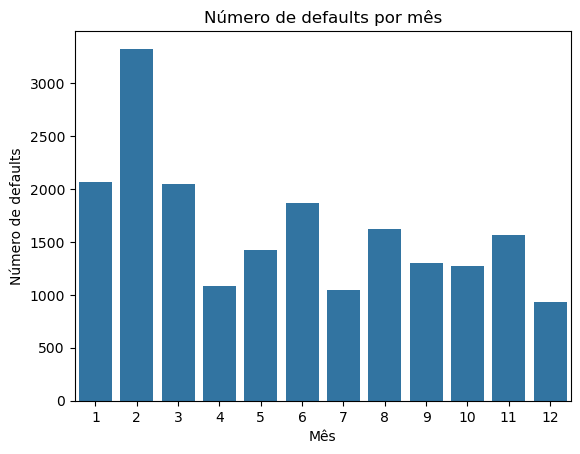

In [40]:
# Distribuição dos calotes por mês
defaults_by_month = defaults_df[['month', 'default']].groupby('month').agg('sum')
sns.barplot(data=defaults_by_month, x='month', y='default')
plt.xlabel('Mês')
plt.ylabel('Número de defaults')
plt.title('Número de defaults por mês')
plt.show()

Verificamos que há um pico no número de defaults no mês de **fevereiro**. Uma hipótese razoável para explicar esse comportamento é de que fevereiro também é o pico no número de pedidos e, por consequência, seria o mês com maior número de calotes. Vamos verificar essa hipótese a seguir:

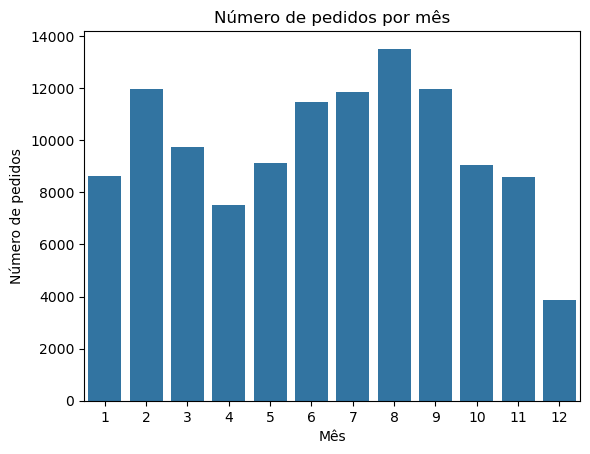

In [23]:
# Plotando a quantidade de pedidos por mês
sns.countplot(data=defaults_df, x='month')
plt.xlabel('Mês')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por mês')
plt.show()

A partir do gráfico acima, identificamos que fevereiro é sim um dos meses com maior número de pedidos, mas essa variável **não** explica de forma **satisfatória** o número de calotes. Isso fica evidente ao analisar o mês de agosto, que apresenta o maior número de pedidos no ano, mas uma quantidade de defaults apenas próxima à média. Sendo assim, é importante levantar outras hipóteses que expliquem esse comportamento, como o fato de o modelo de negócios da maior parte da base de clientes ter sazonalidade, com baixo volume de receitas no início do ano, o que aumenta a probabilidade de calote nessa época

Por fim, é interessante identificarmos qual a direção e intensidade das correlações entre as diferentes variáveis, de forma a compreender mais a fundo o comportamento de default dos clientes. Para isso, usaremos um mapa de calor:

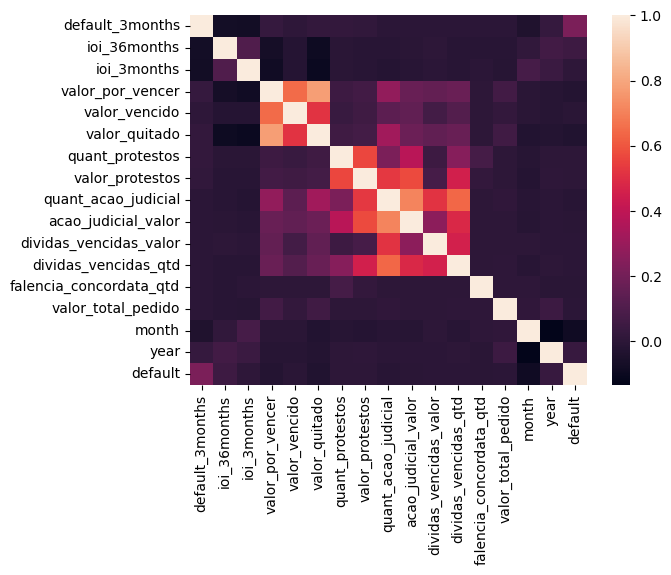

In [25]:
# Plotando o heatmap de correlação entre as variáveis
sns.heatmap(data=defaults_df.corr(numeric_only=True))
plt.show()

A partir do mapa de calor acima, identificamos que algumas variáveis têm correlações significativas entre si. Ao treinarmos o modelo de previsão de default, iremos remover uma das features de pares que apresentam alta correlação (valor absoluto > 0.7), pois uma feature pode ser obtida a partir da outra. Isso facilita a interpretação do nosso modelo e melhora a eficiência computacional e a capacidade de generalização

In [44]:
# Calculando a matriz de correlação entre as variáveis
corr = defaults_df.corr(numeric_only=True)

# Identificando as variáveis com correlação, em valor absoluto, maior que 0.7
corr[corr > 0.7]

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
default_3months,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ioi_36months,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ioi_3months,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valor_por_vencer,NaN,NaN,NaN,1.000000,NaN,0.776372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valor_vencido,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valor_quitado,NaN,NaN,NaN,0.776372,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quant_protestos,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valor_protestos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quant_acao_judicial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.708334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acao_judicial_valor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708334,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por meio do output acima, identificamos que tanto as variáveis **valor quitado** e **valor por vencer** como também as variáveis **quantidade de ações judiciais** e **valor em ações judiciais** apresentam alta correlação entre si. No primeiro par de variáveis (valor quitado e valor por vencer), não realizaremos a exclusão de uma das variáveis por entendermos que cada uma abrange um aspecto importante e diferente e que devem ser levados em consideração pelo modelo. Por outro lado, o segundo par de variáveis abrangem o mesmo fator (ações judiciais), sendo, portanto, redundante mantermos as duas variáveis, visto que, dada a alta correlação, uma pode ser obtida a partir da outra!

### Dados categóricos

In [51]:
# Entendendo os tipos de sociedade das empresas-clientes da base
print(defaults_df['tipo_sociedade'].value_counts(normalize=True))

tipo_sociedade
sociedade empresaria limitada                     0.511797
empresario (individual)                           0.230701
empresa individual respons limitada empresaria    0.163729
empresario-mei(microempreendedor individual)      0.058718
sociedade anonima fechada                         0.021164
missing                                           0.005184
cooperativa                                       0.004835
sociedade simples limitada                        0.001032
outras formas de associacao                       0.000904
sociedade anonima aberta                          0.000682
fundacao privada                                  0.000418
organizacao religiosa                             0.000281
sociedade de economia mista                       0.000239
sociedade simples pura                            0.000196
servico social autonomo                           0.000051
municipio                                         0.000051
entidade sindical                        

In [49]:
# Entendendo a opção tributária das empresas-clientes da base
print(defaults_df['opcao_tributaria'].value_counts(normalize=True))

opcao_tributaria
simples nacional    0.750326
missing             0.156259
lucro real          0.066571
lucro presumido     0.023509
isento              0.003334
Name: proportion, dtype: float64


Os outputs acima são de grande importância para o entendimento da base de clientes, já que demonstram que mais de 75% da base de clientes são micro ou pequenas empresas (os únicos tipos de empresa com possibilidade de aderir ao Simples Nacional), sendo, muitas vezes, empresas individuais!

In [17]:
print(defaults_df['atividade_principal'].value_counts(normalize=True))

atividade_principal
com de equipamentos de informatica              0.192960
com de telefones e equip p/ comunicacoes        0.084001
papelaria                                       0.077384
com de moveis e estofados                       0.070144
com de eletrodomesticos                         0.069547
                                                  ...   
locacao de roupas e outros art do vestuario     0.000017
promocao de eventos                             0.000017
emissora de radio                               0.000017
ind de combustiveis e lubrificantes             0.000017
usinagem, tratamento, revestimento de metais    0.000009
Name: proportion, Length: 204, dtype: float64


In [19]:
print(defaults_df['forma_pagamento'].value_counts(normalize=True))

forma_pagamento
missing                     0.276935
30/60/90                    0.250825
30/60/90/120                0.061941
28/42/56                    0.055281
28 dias                     0.028779
                              ...   
80/110/140/170/200/230      0.000017
110 dias                    0.000017
36x (0+36)                  0.000009
65/80/95/110/125/140/155    0.000009
sem pagamento               0.000009
Name: proportion, Length: 105, dtype: float64


Por fim, as últimas duas variáveis categóricas não nos trazem muitos insights, principalmente pela quantidade de categorias em cada coluna, mas destacam=se a proporção de clientes do setor de equipamentos de informática e o fato de a "categoria" com mais valores em **forma_pagamento** serem valores ausentes, o que sugere uma limitação dos dados disponíveis e da utilização dessa variável como input para um modelo de previsão

In [60]:
defaults_df.columns

Index(['default_3months', 'ioi_36months', 'ioi_3months', 'valor_por_vencer',
       'valor_vencido', 'valor_quitado', 'quant_protestos', 'valor_protestos',
       'quant_acao_judicial', 'acao_judicial_valor', 'dividas_vencidas_valor',
       'dividas_vencidas_qtd', 'falencia_concordata_qtd', 'tipo_sociedade',
       'opcao_tributaria', 'atividade_principal', 'forma_pagamento',
       'valor_total_pedido', 'month', 'year', 'default'],
      dtype='object')